In [1]:
import pandas as pd
import numpy as np
import librosa
import os
import json
import soundfile as sf
import ffmpeg
import IPython.display as ipd

import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn import preprocessing


Using TensorFlow backend.


In [3]:
df = pd.read_csv('Train.csv')
sample_sub = pd.read_csv('SampleSubmission.csv')
df.shape, sample_sub.shape

((1109, 2), (1017, 194))

In [4]:
DATASET_PATH = "audio_files"
JSON_PATH = "nd.json"
SAMPLES_TO_CONSIDER = 22050 # 1 sec. of audio

In [4]:
sample, sr = librosa.load('audio_files/01QEEZI.wav')

In [5]:
sample.shape, sr

((54243,), 22050)

In [12]:
# def preprocess_dataset(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512):
#     """Extracts MFCCs from music dataset and saves them into a json file.

#     :param dataset_path (str): Path to dataset
#     :param json_path (str): Path to json file used to save MFCCs
#     :param num_mfcc (int): Number of coefficients to extract
#     :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
#     :param hop_length (int): Sliding window for FFT. Measured in # of samples
#     :return:
#     """

#     # dictionary where we'll store mapping, labels, MFCCs and filenames
#     data_new = {
#         "mapping": [],
#         "labels": [],
#         "MFCCs": [],
#         "files": []
#     }
    
#     #looping through the train.csv 
#     for i in df['fn']:
        
        
            
#         # load audio file and slice it to ensure length consistency among different files
#         signal, sample_rate = librosa.load(i)

#         # drop audio files with less than pre-decided number of samples
#         if len(signal) >= SAMPLES_TO_CONSIDER:
#            # ensure consistency of the length of the signal
#             signal = signal[:SAMPLES_TO_CONSIDER]

#            # extract MFCCs
#             MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
#                                                  hop_length=hop_length)
#            # store data for analysed track
#             data_new["MFCCs"].append(MFCCs.T.tolist())
#             data_new["files"].append(i)
            
#     for j in df['label']: 
        
#            # store data for analysed track
#             data_new["labels"].append(j)
            
#             print("{}: {}".format(i, j))

#     # save data in json file
#     with open(json_path, "w") as fp:
#         json.dump(data_new, fp, indent=4)


# if __name__ == "__main__":
#     preprocess_dataset(DATASET_PATH, JSON_PATH)   

In [14]:
df.head()

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu


Training sets loaded!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 11, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 42, 11, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 6, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 4, 32)         18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 4, 32)         128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 2, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None

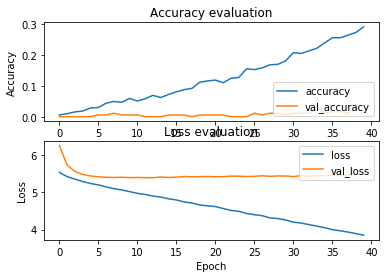

222/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [37]:
# list(le.classes_)